In [3]:
%matplotlib ipympl
import numpy as np
import cv2
import pickle
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pytransform3d.rotations import *

In [7]:
Rs = pickle.load(open("../Rs.pkl", "rb"))
ts = pickle.load(open("../ts.pkl", "rb"))
map_points = pickle.load(open("../map_points.pkl", "rb"))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.set_zlim([-25,25])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot_basis(ax, np.eye(3), np.zeros(3,))
for R, t in zip(Rs, ts):
    plot_basis(ax, R, t.reshape(3,))
    
m = map_points[0]["mask"]
ax.scatter(map_points[0]["pts_3d"][m, 0], map_points[0]["pts_3d"][m, 1], map_points[0]["pts_3d"][m, 2], s=1)

plt.show()

FigureCanvasNbAgg()

In [5]:
map_points[0]["pts_3d"]

array([[ -2.94850682,   0.80231726,  19.32300943],
       [ 10.98307193,   1.33775226,  19.51356268],
       [  5.63523702,   2.24292049,  19.35714455],
       ..., 
       [  0.29409611,  -1.44233714,   2.06248084],
       [ -2.79667254,  -2.26016737,  -4.89183778],
       [-23.29283717,  15.15935244, -47.97762623]])

In [6]:
map_points[0]["mask"][map_points[0]["mask"]==True].shape

(1134,)

In [7]:
map_points[0]["pts_3d"][map_points[0]["mask"], 2]

array([ 19.32300943,  19.51356268,  19.35714455, ...,  19.98336336,
        19.30982126,   2.06248084])

In [8]:
valid_map_pts.shape

NameError: name 'valid_map_pts' is not defined

In [9]:
Rs[0], ts[0]

(array([[  9.99999197e-01,   5.07508409e-04,  -1.16156474e-03],
        [ -5.09694735e-04,   9.99998098e-01,  -1.88270327e-03],
        [  1.16060704e-03,   1.88329380e-03,   9.99997553e-01]]),
 array([[-0.01696952],
        [-0.99771767],
        [-0.09221447]]))

In [10]:
def to_twist(R, t):
    """Convert a 3x3 rotation matrix and translation vector (shape (3,))
    into a 6D twist coordinate (shape (6,))."""
    r, _ = cv2.Rodrigues(R)
    twist = np.zeros((6,))
    twist[:3] = r.reshape(3,)
    twist[3:] = t.reshape(3,)
    return twist

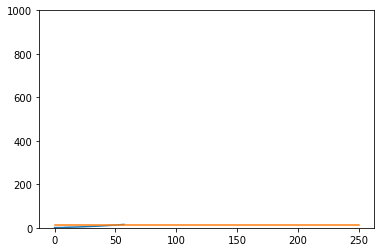

In [11]:
# the weights are chosen to make the difference more sensitive to changes in rotation and z-coordinate
pose_distance_weights = np.array([[10, 0, 0, 0, 0, 0],  # r1
                                  [0, 10, 0, 0, 0, 0],  # r2
                                  [0, 0, 10, 0, 0, 0],  # r3
                                  [0, 0, 0, 1, 0, 0],   # t1 = x
                                  [0, 0, 0, 0, 1, 0],   # t2 = y
                                  [0, 0, 0, 0, 0, 10]]) # t3 = z
pose_distance_threshold = 15

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([0, 1000])

dists = []
for R_rel, t_rel in zip(Rs, ts):
    curent_pose = to_twist(R_rel, t_rel).reshape(6, 1)
    dist = np.matmul(np.matmul(curent_pose.T, pose_distance_weights), curent_pose)
    dists.append(float(dist))
    
ax.plot(dists)
ax.plot([0, 250],[pose_distance_threshold, pose_distance_threshold])
plt.show()

In [12]:
dists

[1.080815112864561,
 1.099635895042237,
 1.1020899114215992,
 1.1317393523860697,
 1.1638362250042316,
 1.1868185010974048,
 1.2143778330193047,
 1.242084987603421,
 2.042548646527278,
 2.1811113337894343,
 2.3287561118774147,
 2.489528912157104,
 2.6515645909211427,
 2.791505546639665,
 2.9500926577360387,
 3.1090695651838014,
 3.277922956273807,
 3.4520244727668636,
 3.6230544740011017,
 3.7898222735219362,
 4.038830740112527,
 4.248640163110414,
 4.456448617912029,
 4.677271714787187,
 4.881421471869882,
 5.0961962881951015,
 5.341642156123,
 5.584539576116799,
 5.844196011335136,
 6.0610715790921486,
 6.286235423133577,
 6.516060952953086,
 6.802652104271481,
 7.039489498362957,
 7.339180707631333,
 7.586334944149103,
 7.871505639629514,
 8.141807317515443,
 8.482437791868234,
 8.803607970942881,
 9.100644258182053,
 9.453306680774054,
 9.81613888164111,
 10.21170169079852,
 10.567619486892672,
 10.85362431508068,
 11.177088207676398,
 11.542145032656675,
 11.945884142266122,
 12.2